# 01 - 建立你的第一個 LangGraph Agent

## 📚 學習目標

在這個 notebook 中,你將學會:

- ✅ 安裝和設定 LangGraph 環境
- ✅ 理解 State、Node、Edge 的基本概念
- ✅ 建立一個簡單但完整的 LangGraph Agent
- ✅ 執行 Agent 並查看結果
- ✅ 視覺化 Agent 的工作流程

## ⏰ 預計時間: 30 分鐘

---

## Part 1: 環境設定

### 📦 安裝必要套件

In [1]:
# 安裝必要套件 (第一次執行時需要)
!uv add langgraph langchain langchain-openai python-dotenv

Resolved 152 packages in 813ms                                       
⠙ Preparing packages... (0/8)                                                   ⠋ Preparing packages... (0/0)                                                   
⠙ Preparing packages... (0/8)-------------------     0 B/970.70 KiB          
⠙ Preparing packages... (0/8)-------------------     0 B/970.70 KiB          
distro               ------------------------------     0 B/19.80 KiB
⠙ Preparing packages... (0/8)-------------------     0 B/970.70 KiB          
distro               ------------------------------ 16.00 KiB/19.80 KiB
⠙ Preparing packages... (0/8)-------------------     0 B/970.70 KiB          
distro               ------------------------------ 16.00 KiB/19.80 KiB
⠙ Preparing packages... (0/8)-------------------     0 B/970.70 KiB          
distro               ------------------------------ 16.00 KiB/19.80 KiB
⠙ Preparing packages... (0/8)-------------------     0 B/970.70 KiB          
distro         

### 🔑 設定 API Key

建立 `.env` 檔案或直接在這裡設定:

In [2]:
import os
from dotenv import load_dotenv

# 方法 1: 從 .env 檔案載入
load_dotenv()

# 方法 2: 直接設定 (請替換成你的 API Key)
# os.environ['OPENAI_API_KEY'] = 'sk-your-api-key-here'

# 驗證 API Key 是否設定成功
if os.getenv('OPENAI_API_KEY'):
    print("✅ API Key 設定成功!")
else:
    print("❌ 請設定 OPENAI_API_KEY")

✅ API Key 設定成功!


### 📚 導入必要模組

In [3]:
from typing import TypedDict
from langgraph.graph import StateGraph, END
from langchain_openai import ChatOpenAI

print("✅ 所有模組導入成功!")

✅ 所有模組導入成功!


---

## Part 2: 理解核心概念

### 🎯 LangGraph 三大核心組件

```
┌─────────────────────────────────────────┐
│  State (狀態)                           │
│  - 資料的容器                           │
│  - 在節點間傳遞                         │
│  - 使用 TypedDict 定義                  │
└─────────────────────────────────────────┘
           ↓
┌─────────────────────────────────────────┐
│  Node (節點)                            │
│  - 執行具體邏輯的函數                   │
│  - 接收 State,返回更新的 State         │
│  - 可以呼叫 LLM、處理資料等             │
└─────────────────────────────────────────┘
           ↓
┌─────────────────────────────────────────┐
│  Edge (邊)                              │
│  - 連接節點的路徑                       │
│  - 定義執行順序                         │
│  - 可以是固定或條件式的                 │
└─────────────────────────────────────────┘
```

---

## Part 3: 建立第一個 Agent - 問候機器人

### Step 1: 定義 State (狀態)

In [4]:
class GreetingState(TypedDict):
    """
    定義 Agent 的狀態結構
    
    欄位說明:
    - user_name: 使用者名稱 (輸入)
    - greeting: 生成的問候語 (輸出)
    """
    user_name: str
    greeting: str

print("✅ State 定義完成")
print(f"State 欄位: {GreetingState.__annotations__}")

✅ State 定義完成
State 欄位: {'user_name': <class 'str'>, 'greeting': <class 'str'>}


### Step 2: 定義 Node (節點函數)

In [5]:
def generate_greeting(state: GreetingState) -> GreetingState:
    """
    生成個性化問候語的節點
    
    Args:
        state: 當前狀態,包含 user_name
    
    Returns:
        更新後的狀態,包含生成的 greeting
    """
    # 建立 LLM 實例
    llm = ChatOpenAI(
        model="gpt-4",
        temperature=0.7  # 控制創意程度
    )
    
    # 建立提示詞
    prompt = f"用友善、專業的方式向 {state['user_name']} 打招呼。使用繁體中文,1-2 句話即可。"
    
    # 呼叫 LLM
    response = llm.invoke(prompt)
    
    # 返回更新的狀態
    return {
        "greeting": response.content
    }

print("✅ 節點函數定義完成")

✅ 節點函數定義完成


### Step 3: 建立 Graph (工作流程)

In [6]:
# 1. 建立 StateGraph 實例
workflow = StateGraph(GreetingState)

# 2. 添加節點
workflow.add_node(
    "greet",              # 節點名稱
    generate_greeting     # 節點函數
)

# 3. 設定入口點 (從哪個節點開始)
workflow.set_entry_point("greet")

# 4. 添加邊 (定義流程)
workflow.add_edge(
    "greet",   # 從 greet 節點
    END        # 到結束
)

# 5. 編譯成可執行的 Agent
greeting_agent = workflow.compile()

print("✅ Agent 建立完成!")

✅ Agent 建立完成!


### Step 4: 執行 Agent

In [7]:
# 準備輸入狀態
input_state = {
    "user_name": "小明"
}

# 執行 Agent
result = greeting_agent.invoke(input_state)

# 顯示結果
print("\n" + "="*50)
print(f"使用者: {result['user_name']}")
print(f"問候語: {result['greeting']}")
print("="*50)


使用者: 小明
問候語: 您好，小明先生，我們很高興與您交流，請問有什麼我們可以協助您的呢？


---

## Part 4: 視覺化 Agent 流程

### 生成流程圖

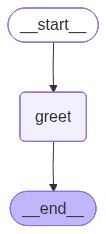

✅ 流程圖生成成功


In [8]:
from IPython.display import Image, display

try:
    # 生成 Mermaid 圖
    graph_image = greeting_agent.get_graph().draw_mermaid_png()
    
    # 顯示圖片
    display(Image(graph_image))
    
    print("✅ 流程圖生成成功")
except Exception as e:
    print(f"⚠️ 流程圖生成失敗: {e}")
    print("提示: 這是可選功能,不影響 Agent 執行")

---

## Part 5: 進階範例 - 多節點 Agent

讓我們建立一個稍微複雜的 Agent,包含多個處理步驟。

### 定義多步驟 State

In [9]:
class MultiStepState(TypedDict):
    """多步驟 Agent 的狀態"""
    user_input: str       # 使用者輸入
    analysis: str         # 分析結果
    response: str         # 最終回應
    sentiment: str        # 情感分析結果

### 定義多個節點

In [10]:
def analyze_input(state: MultiStepState) -> MultiStepState:
    """分析使用者輸入"""
    llm = ChatOpenAI(model="gpt-4")
    
    prompt = f"簡短分析這段文字的主題: {state['user_input']}"
    analysis = llm.invoke(prompt).content
    
    return {"analysis": analysis}


def detect_sentiment(state: MultiStepState) -> MultiStepState:
    """偵測情感"""
    llm = ChatOpenAI(model="gpt-4")
    
    prompt = f"判斷這段文字的情感 (正面/負面/中性): {state['user_input']}"
    sentiment = llm.invoke(prompt).content
    
    return {"sentiment": sentiment}


def generate_response(state: MultiStepState) -> MultiStepState:
    """生成回應"""
    llm = ChatOpenAI(model="gpt-4")
    
    prompt = f"""
    根據以下資訊生成適當的回應:
    
    使用者輸入: {state['user_input']}
    主題分析: {state['analysis']}
    情感: {state['sentiment']}
    
    請用繁體中文回應,保持友善和專業。
    """
    
    response = llm.invoke(prompt).content
    
    return {"response": response}

print("✅ 所有節點定義完成")

✅ 所有節點定義完成


### 建立多節點工作流程

In [11]:
# 建立工作流程
multi_workflow = StateGraph(MultiStepState)

# 添加所有節點
multi_workflow.add_node("analyze", analyze_input)
multi_workflow.add_node("sentiment", detect_sentiment)
multi_workflow.add_node("respond", generate_response)

# 設定流程
multi_workflow.set_entry_point("analyze")
multi_workflow.add_edge("analyze", "sentiment")    # analyze -> sentiment
multi_workflow.add_edge("sentiment", "respond")    # sentiment -> respond
multi_workflow.add_edge("respond", END)            # respond -> END

# 編譯
multi_agent = multi_workflow.compile()

print("✅ 多節點 Agent 建立完成!")

✅ 多節點 Agent 建立完成!


### 執行多節點 Agent

In [12]:
# 執行 Agent
result = multi_agent.invoke({
    "user_input": "今天天氣真好,很適合出門踏青!"
})

# 顯示結果
print("\n" + "="*60)
print(f"📥 使用者輸入: {result['user_input']}")
print(f"\n📊 主題分析: {result['analysis']}")
print(f"\n😊 情感判斷: {result['sentiment']}")
print(f"\n💬 系統回應: {result['response']}")
print("="*60)


📥 使用者輸入: 今天天氣真好,很適合出門踏青!

📊 主題分析: 這段文字的主題是"優良的天氣與戶外活動"。主要講述了當天的天氣狀況並推薦出門參與戶外活動如踏青。

😊 情感判斷: 正面

💬 系統回應: 回應: 確實如此，當天氣如此晴朗，出門踏青的確是不錯的選擇。希望您能充分享受大自然的優美風光，在愉快的氛圍中度過一個豐富的日子。


---

## 🎯 練習題

現在輪到你了!嘗試完成以下練習:

### 練習 1: 個性化問候 Agent

修改第一個 Agent,添加:
- 使用者的年齡
- 根據年齡調整問候語的風格 (正式/輕鬆)

In [13]:
# 你的程式碼
class PersonalizedState(TypedDict):
    user_name: str
    user_age: int
    greeting: str

def personalized_greeting(state: PersonalizedState) -> PersonalizedState:
    # TODO: 實作這個函數
    # 提示: 使用 state['user_age'] 來調整問候語風格
    pass

# TODO: 建立和執行 Agent

### 練習 2: 四步驟分析 Agent

建立一個包含 4 個節點的 Agent:
1. 提取關鍵字
2. 分析情感
3. 判斷緊急程度
4. 生成回應

In [14]:
# 你的程式碼
class AnalysisState(TypedDict):
    # TODO: 定義狀態欄位
    pass

# TODO: 定義 4 個節點函數

# TODO: 建立工作流程

# TODO: 執行並測試

---

## ✅ 解答參考

### 練習 1 解答

In [15]:
# 練習 1 解答
def personalized_greeting_solution(state: PersonalizedState) -> PersonalizedState:
    """根據年齡產生個性化問候"""
    llm = ChatOpenAI(model="gpt-4")
    
    # 根據年齡決定風格
    if state['user_age'] < 18:
        style = "輕鬆活潑,適合年輕人"
    elif state['user_age'] < 40:
        style = "友善親切,適合成年人"
    else:
        style = "正式有禮,適合長輩"
    
    prompt = f"用 {style} 的方式向 {state['user_name']} ({state['user_age']}歲) 打招呼。用繁體中文。"
    
    response = llm.invoke(prompt)
    
    return {"greeting": response.content}

# 建立 Agent
personalized_workflow = StateGraph(PersonalizedState)
personalized_workflow.add_node("greet", personalized_greeting_solution)
personalized_workflow.set_entry_point("greet")
personalized_workflow.add_edge("greet", END)
personalized_agent = personalized_workflow.compile()

# 測試不同年齡
for age in [15, 30, 60]:
    result = personalized_agent.invoke({
        "user_name": "測試用戶",
        "user_age": age
    })
    print(f"\n年齡 {age}: {result['greeting']}")


年齡 15: 嗨！小夥伴，你好！歡迎來到我們的測試區，你準備好開始探索這個充滿樂趣的地方了嗎？讓我們一起踏上這趟驚奇的旅程吧！記得，如果有任何疑問或需要幫助，隨時找我，我一直都在！讓我們一起玩得開心、學習得開心，開始吧！

年齡 30: 您好！歡迎您進入我們的系統，有什麼需要我為您服務的地方嗎？讓我們攜手共創一個美好的體驗旅程吧！

年齡 60: 尊敬的測試用戶先生/女士，您好！感謝您抽出寶貴的時間與我們溝通。祝您天天都有好心情，身體健康，萬事如意。


---

## 📝 重點回顧

恭喜完成第一個 notebook!你已經學會:

1. ✅ **State 定義**: 使用 `TypedDict` 定義資料結構
2. ✅ **Node 建立**: 撰寫處理邏輯的函數
3. ✅ **Graph 構建**: 組合 State、Node、Edge
4. ✅ **Agent 執行**: invoke() 執行並取得結果
5. ✅ **多節點流程**: 建立包含多個步驟的 Agent

### 核心概念

```python
# LangGraph 基本結構
State → Node → Edge → Graph → Agent
```

### 下一步

在下一個 notebook 中,我們將學習:
- 更進階的 State 管理
- 狀態累加 (Annotated)
- 狀態追蹤和除錯

繼續前往 `02-state-management.ipynb` 👉